In [37]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [38]:
df = pd.read_csv('./test.csv',encoding='euc-kr')
df

,idx,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss
0,1,남,INTP,855,715,0,0,0,독학,공과계열,0
1,2,남,ENTJ,800,710,0,0,850,독학,공과계열,1
2,3,여,INFP,750,0,0,750,0,학원,인문계열,1
3,4,남,ESTP,850,750,0,0,0,학원,자연과학계열,0
4,5,여,ENFJ,900,700,0,0,0,인강,사회계열,0
...,...,...,...,...,...,...,...,...,...,...,...
229,230,여,INFP,800,0,0,750,0,독학,자연과학계열,0
230,231,여,ISTJ,900,750,0,0,0,학원,자연과학계열,0
231,232,여,ISTP,800,700,0,0,0,학원,사회계열,0
232,233,여,ISFJ,800,0,600,0,0,기타,사회계열,0


In [3]:
df.columns
s = ['toeic', 'teps', 'toeic_sp', 'opic']
for e in s:
    for i in range(len(df)):
        if df[e][i] > 0 :
            df[e][i] = 1
        else :
            df[e][i] = 0

C:\Users\admin\AppData\Local\Temp\ipykernel_13264\3687464101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[e][i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_13264\3687464101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[e][i] = 0


In [47]:
df[df['toeic']>0][['mbti','toeic']]

,mbti,toeic
0,INTP,715
1,ENTJ,710
3,ESTP,750
4,ENFJ,700
8,ESTP,850
...,...,...
224,ESFJ,900
227,INTP,750
228,INFJ,710
230,ISTJ,750


In [5]:
gdf = df.groupby('mbti')[['toeic','teps','toeic_sp','opic']].sum()
gdf = gdf.T.copy()
gdf

mbti,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
toeic,12,1,37,4,1,0,1,24,17,12,12,2,0,0,1,1
teps,0,1,12,13,0,0,1,0,1,12,0,0,1,1,0,12
toeic_sp,1,1,0,0,0,0,0,1,14,37,0,0,0,0,0,0
opic,0,1,24,14,0,1,0,0,13,12,1,0,0,0,0,0


In [6]:
co=df['mbti'].unique()
co = list(co)
bb = [[co[e] for i in range(4)] for e in range(len(co))]
bb = sum(bb,[])
aa = pd.DataFrame()
for e in co:
    aa = pd.concat([aa, gdf[e]],axis=0)
aa.columns = ['선호도']
aa['mbti'] = bb
aa = aa.reset_index()
aa.columns = ['시험종류','선호도','mbti']
aa

,시험종류,선호도,mbti
0,toeic,2.0,INTP
1,teps,0.0,INTP
2,toeic_sp,0.0,INTP
3,opic,0.0,INTP
4,toeic,37.0,ENTJ
...,...,...,...
59,opic,0.0,ISFJ
60,toeic,0.0,ISFP
61,teps,1.0,ISFP
62,toeic_sp,0.0,ISFP


<AxesSubplot:xlabel='시험종류', ylabel='선호도'>

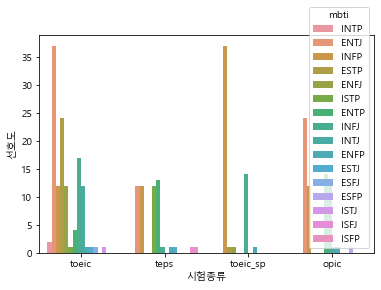

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 지정
plt.rc('font', family = "Malgun Gothic")
sns.set_palette("pastel")
sns.barplot(x='시험종류', y='선호도',hue='mbti',data=aa)

## 카이제곱 검정

In [8]:
df['EI'] = df['mbti'].str[0:1]
df['NS'] = df['mbti'].str[1:2]
df['TF'] = df['mbti'].str[2:3]
df['PJ'] = df['mbti'].str[3:4]
xdf = df.copy()
kdf = df.copy()

In [9]:
ttoeic = df[['idx','toeic']]
tteps = df[['idx','teps']]
ttos = df[['idx','toeic_sp']]
topic = df[['idx','opic']]

In [10]:
for i in range(len(ttoeic)):
    if ttoeic['toeic'][i] == 1:
        ttoeic.loc[i,'토익여부'] = 'toeic'
    else:
        ttoeic.loc[i,'토익여부'] = 0
ttoeic = ttoeic[ttoeic['토익여부']!=0]
ttoeic = ttoeic[['idx','토익여부']]

C:\Users\admin\AppData\Local\Temp\ipykernel_13264\348014641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttoeic.loc[i,'토익여부'] = 'toeic'


In [11]:
for i in range(len(tteps)):
    if tteps['teps'][i] == 1:
        tteps.loc[i,'텝스여부'] = 'teps'
    else:
        tteps.loc[i,'텝스여부'] = 0
tteps = tteps[tteps['텝스여부']!=0]
tteps = tteps[['idx','텝스여부']]

C:\Users\admin\AppData\Local\Temp\ipykernel_13264\466069400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteps.loc[i,'텝스여부'] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_13264\466069400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteps.loc[i,'텝스여부'] = 'teps'


In [12]:
for i in range(len(ttos)):
    if ttos['toeic_sp'][i] == 1:
        ttos.loc[i,'토익스피킹여부'] = 'toeic_sp'
    else:
        ttos.loc[i,'토익스피킹여부'] = 0
ttos = ttos[ttos['토익스피킹여부']!=0]
ttos = ttos[['idx','토익스피킹여부']]

C:\Users\admin\AppData\Local\Temp\ipykernel_13264\3864622117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttos.loc[i,'토익스피킹여부'] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_13264\3864622117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttos.loc[i,'토익스피킹여부'] = 'toeic_sp'


In [13]:
for i in range(len(ttos)):
    if topic['opic'][i] == 1:
        topic.loc[i,'오픽여부'] = 'opic'
    else:
        topic.loc[i,'오픽여부'] = 0
topic = topic[topic['오픽여부']== 'opic']
topic = topic[['idx','오픽여부']]

C:\Users\admin\AppData\Local\Temp\ipykernel_13264\424411901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic.loc[i,'오픽여부'] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_13264\424411901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic.loc[i,'오픽여부'] = 'opic'


In [14]:
tteps.columns = ['idx','토익여부']
ttos.columns = ['idx','토익여부']
topic.columns = ['idx','토익여부']

In [15]:
ttos.reset_index(drop=True)

,idx,토익여부
0,3,toeic_sp
1,11,toeic_sp
2,12,toeic_sp
3,14,toeic_sp
4,20,toeic_sp
5,28,toeic_sp
6,29,toeic_sp
7,31,toeic_sp
8,37,toeic_sp
9,45,toeic_sp


In [16]:
cdf = pd.concat([ttoeic,tteps,ttos,topic],axis = 0)
cdf.columns = ['idx','시험기록']
kdf = pd.merge(cdf,kdf,left_on='idx',right_on='idx',how='left')
kdf

,idx,시험기록,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss,EI,NS,TF,PJ
0,1,toeic,남,INTP,855,1,0,0,0,독학,공과계열,0,I,N,T,P
1,2,toeic,남,ENTJ,800,1,0,0,1,독학,공과계열,1,E,N,T,J
2,4,toeic,남,ESTP,850,1,0,0,0,학원,자연과학계열,0,E,S,T,P
3,5,toeic,여,ENFJ,900,1,0,0,0,인강,사회계열,0,E,N,F,J
4,9,toeic,여,ESTP,900,1,0,0,0,학원,인문계열,0,E,S,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,42,opic,남,INFJ,800,0,0,0,1,독학,공과계열,1,I,N,F,J
245,46,opic,여,INFP,700,1,1,1,1,독학,공과계열,1,I,N,F,P
246,50,opic,여,ENTP,800,0,0,0,1,학원,상경계열,0,E,N,T,P
247,51,opic,남,ENTJ,900,0,0,0,1,독학,상경계열,1,E,N,T,J


In [17]:
cdf

,idx,시험기록
0,1,toeic
1,2,toeic
3,4,toeic
4,5,toeic
8,9,toeic
...,...,...
41,42,opic
45,46,opic
49,50,opic
50,51,opic


In [18]:
ctabEI = pd.crosstab(index = kdf['EI'], columns = kdf['시험기록'])
ctabNS = pd.crosstab(index = kdf['NS'], columns = kdf['시험기록'])
ctabTF = pd.crosstab(index = kdf['TF'], columns = kdf['시험기록'])
ctabPJ = pd.crosstab(index = kdf['PJ'], columns = kdf['시험기록'])
ctabEI

시험기록,opic,teps,toeic,toeic_sp
EI,,,,
E,10,27,80,3
I,6,27,45,51


In [21]:
### 검정 하기
resultEI = stats.chi2_contingency(ctabEI)
resultNS = stats.chi2_contingency(ctabNS)
resultTF = stats.chi2_contingency(ctabTF)
resultPJ = stats.chi2_contingency(ctabPJ)
pvEI = resultEI[1]
pvNS = resultNS[1]
pvTF = resultTF[1]
pvPJ = resultPJ[1]
# print("검정결과 = ", resultEI)
# print("검정결과 = ", resultNS)
# print("검정결과 = ", resultTF)
# print("검정결과 = ", resultPJ)

print("EI 검정 통계량 = %.3f,  p-value = %.3f" % (resultEI[0], pvEI))
print("NS 검정 통계량 = %.3f,  p-value = %.3f" % (resultNS[0], pvNS))
print("TF 검정 통계량 = %.3f,  p-value = %.3f" % (resultTF[0], pvTF))
print("PJ 검정 통계량 = %.3f,  p-value = %.3f" % (resultPJ[0], pvPJ))


# (해석 - 검증결과)
#  1. p-value=0.778 > 0.05 이므로, 귀무가설 채택
#  2. 귀무가설 채택 : 단과대별로 선호하는 어학시험에는 차이가 없다
#                   : 동질이다

EI 검정 통계량 = 53.211,  p-value = 0.000
NS 검정 통계량 = 18.436,  p-value = 0.000
TF 검정 통계량 = 71.722,  p-value = 0.000
PJ 검정 통계량 = 33.115,  p-value = 0.000


In [22]:
def resultfuction(pvEI,pvNS,pvTF,pvPJ):
    resultsEI = ""
    if pvEI > 0.05 :
        resultsEI = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                    "<br> E/I에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 없다.(귀무가설 채택)</b>".format(pvEI)
    else :
        resultsEI = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                    "<br> E/I에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 있다.(대립가설 채택)</b>".format(pvEI)
        
    resultsNS = ""
    if pvNS > 0.05 :
        resultsNS = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                    "<br> N/S에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 없다.(귀무가설 채택)</b>".format(pvNS)
    else :
        resultsNS = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                    "<br> N/S에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 있다.(대립가설 채택)</b>".format(pvNS)
        
    resultsTF = ""
    if pvTF > 0.05 :
        resultsTF = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                    "<br> T/F에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 없다.(귀무가설 채택)</b>".format(pvTF)
    else :
        resultsTF = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                    "<br> E/I에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 있다.(대립가설 채택)</b>".format(pvTF)
        
    resultsPJ = ""
    if pvPJ > 0.05 :
        resultsPJ = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                    "<br> P/J에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 없다.(귀무가설 채택)</b>".format(pvPJ)
    else :
        resultsPJ = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                    "<br> P/J에 따라 선호하는 어학시험에는 "\
                    "<b>차이가 있다.(대립가설 채택)</b>".format(pvPJ)
    return(resultsEI,resultsNS,resultsTF,resultsPJ)

In [23]:
# 검증결과
resultsEI = ""
if resultEI[1] > 0.05 :
    resultsEI = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                "<br> E/I에 따라 선호하는 어학시험에는 "\
                "<b>차이가 없다.(귀무가설 채택)</b>".format(resultEI[1])
else :
    resultsEI = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                "<br> E/I에 따라 선호하는 어학시험에는 "\
                "<b>차이가 있다.(대립가설 채택)</b>".format(resultEI[1])
resultsEI

'p-value 값이 유의수준 <b>0.000 <= 0.05</b> 이므로, <br> E/I에 따라 선호하는 어학시험에는 <b>차이가 있다.(대립가설 채택)</b>'

In [24]:
# 검증결과
resultsNS = ""
if resultNS[1] > 0.05 :
    resultsNS = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                "<br> N/S에 따라 선호하는 어학시험에는 "\
                "<b>차이가 없다.(귀무가설 채택)</b>".format(resultNS[1])
else :
    resultsNS = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                "<br> N/S에 따라 선호하는 어학시험에는 "\
                "<b>차이가 있다.(대립가설 채택)</b>".format(resultNS[1])
resultsNS

'p-value 값이 유의수준 <b>0.000 <= 0.05</b> 이므로, <br> N/S에 따라 선호하는 어학시험에는 <b>차이가 있다.(대립가설 채택)</b>'

In [25]:
# 검증결과
resultsTF = ""
if resultTF[1] > 0.05 :
    resultsTF = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                "<br> T/F에 따라 선호하는 어학시험에는 "\
                "<b>차이가 없다.(귀무가설 채택)</b>".format(resultTF[1])
else :
    resultsTF = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                "<br> E/I에 따라 선호하는 어학시험에는 "\
                "<b>차이가 있다.(대립가설 채택)</b>".format(resultTF[1])
resultsTF

'p-value 값이 유의수준 <b>0.000 <= 0.05</b> 이므로, <br> E/I에 따라 선호하는 어학시험에는 <b>차이가 있다.(대립가설 채택)</b>'

In [26]:
# 검증결과
resultsPJ = ""
if resultPJ[1] > 0.05 :
    resultsPJ = "p-value 값이 유의수준 <b>{:.3f} > 0.05</b> 이므로, "\
                "<br> P/J에 따라 선호하는 어학시험에는 "\
                "<b>차이가 없다.(귀무가설 채택)</b>".format(resultPJ[1])
else :
    resultsPJ = "p-value 값이 유의수준 <b>{:.3f} <= 0.05</b> 이므로, "\
                "<br> P/J에 따라 선호하는 어학시험에는 "\
                "<b>차이가 있다.(대립가설 채택)</b>".format(resultPJ[1])
resultsPJ

'p-value 값이 유의수준 <b>0.000 <= 0.05</b> 이므로, <br> P/J에 따라 선호하는 어학시험에는 <b>차이가 있다.(대립가설 채택)</b>'

## 독립 두 집단 t-test

In [27]:
tdf = pd.read_csv('./test.csv',encoding='euc-kr')
tdf

,idx,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss
0,1,남,INTP,855,715,0,0,0,독학,공과계열,0
1,2,남,ENTJ,800,710,0,0,850,독학,공과계열,1
2,3,여,INFP,750,0,0,750,0,학원,인문계열,1
3,4,남,ESTP,850,750,0,0,0,학원,자연과학계열,0
4,5,여,ENFJ,900,700,0,0,0,인강,사회계열,0
...,...,...,...,...,...,...,...,...,...,...,...
229,230,여,INFP,800,0,0,750,0,독학,자연과학계열,0
230,231,여,ISTJ,900,750,0,0,0,학원,자연과학계열,0
231,232,여,ISTP,800,700,0,0,0,학원,사회계열,0
232,233,여,ISFJ,800,0,600,0,0,기타,사회계열,0


In [28]:
co

['INTP',
 'ENTJ',
 'INFP',
 'ESTP',
 'ENFJ',
 'ISTP',
 'ENTP',
 'INFJ',
 'INTJ',
 'ENFP',
 'ESTJ',
 'ESFJ',
 'ESFP',
 'ISTJ',
 'ISFJ',
 'ISFP']

In [29]:
# t검정을 활용해서 순위매기기(토익)
df_test = tdf['toeic'] # 토익에 대해서만 체크
df_total_toeic = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['mbti'] == q[i]]
    r = df_test[tdf['mbti'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_toeic = pd.concat([df_total_toeic, df_temp])
df_total_toeic

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeW

,비교대상,검정통계량,p-value
0,INTP vs ENTJ,0.826531,0.412510
0,INTP vs INFP,1.739832,0.090202
0,INTP vs ESTP,0.293999,0.771186
0,INTP vs ENFJ,0.609039,0.552994
0,INTP vs ISTP,4.786854,0.000355
...,...,...,...
0,ESFP vs ISFJ,NaN,NaN
0,ESFP vs ISFP,NaN,NaN
0,ISTJ vs ISFJ,NaN,NaN
0,ISTJ vs ISFP,NaN,NaN


In [30]:
# t검정을 활용해서 순위매기기(텝스)
df_test = tdf['teps'] # 토익에 대해서만 체크
df_total_teps = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['mbti'] == q[i]]
    r = df_test[tdf['mbti'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_teps = pd.concat([df_total_teps, df_temp])
df_total_teps

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeW

,비교대상,검정통계량,p-value
0,INTP vs ENTJ,0.789437,0.433660
0,INTP vs INFP,0.954342,0.346104
0,INTP vs ESTP,NaN,NaN
0,INTP vs ENFJ,NaN,NaN
0,INTP vs ISTP,4.560702,0.000535
...,...,...,...
0,ESFP vs ISFJ,NaN,NaN
0,ESFP vs ISFP,NaN,NaN
0,ISTJ vs ISFJ,NaN,NaN
0,ISTJ vs ISFP,NaN,NaN


In [31]:
# t검정을 활용해서 순위매기기(토익스피킹)
df_test = tdf['toeic_sp'] # 토익에 대해서만 체크
df_total_toeic_sp = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['mbti'] == q[i]]
    r = df_test[tdf['mbti'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_toeic_sp = pd.concat([df_total_toeic_sp, df_temp])
df_total_toeic_sp

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeW

,비교대상,검정통계량,p-value
0,INTP vs ENTJ,NaN,NaN
0,INTP vs INFP,25.654884,3.623849e-25
0,INTP vs ESTP,0.277778,7.834673e-01
0,INTP vs ENFJ,0.380058,7.100389e-01
0,INTP vs ISTP,NaN,NaN
...,...,...,...
0,ESFP vs ISFJ,NaN,NaN
0,ESFP vs ISFP,NaN,NaN
0,ISTJ vs ISFJ,NaN,NaN
0,ISTJ vs ISFP,NaN,NaN


In [32]:
# t검정을 활용해서 순위매기기(오픽)
df_test = tdf['opic'] # 토익에 대해서만 체크
df_total_opic = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['mbti'] == q[i]]
    r = df_test[tdf['mbti'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_opic = pd.concat([df_total_opic, df_temp])
df_total_opic

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeW

,비교대상,검정통계량,p-value
0,INTP vs ENTJ,1.357114,0.180964
0,INTP vs INFP,0.954342,0.346104
0,INTP vs ESTP,NaN,NaN
0,INTP vs ENFJ,NaN,NaN
0,INTP vs ISTP,NaN,NaN
...,...,...,...
0,ESFP vs ISFJ,NaN,NaN
0,ESFP vs ISFP,NaN,NaN
0,ISTJ vs ISFJ,NaN,NaN
0,ISTJ vs ISFP,NaN,NaN
